## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja liniowa prosta

Regresja liniowa prosta, to szczególny przypadek regresji liniowej, w którym zmienną objaśnaną przewidujemy za pomocą jednej zmiennej objaśniającej. Zadanie będzie polegało na wyznaczeniu funkcji regresji opisującej zależność zarobków od lat doświadczenia. 

Zbiór danych do tego zadania, to Salary.csv. Znajduje się w katalogu datasets.
W zbiorze danych znajduje się 35 obserwacji. Każdy wpis jest osobną obserwacją. W zbiorze znajdują się 3 kolumny: YearsExperience, Age i Salary. W pierwszym zadaniu należy wykorzystać YearsExperience i Salary, pomijając Age.

### Imports

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple

### Zadanie 1

Wczytaj dane z pliku Salary.csv, a następnie stwórz wykres przedstawiający obserwacje.

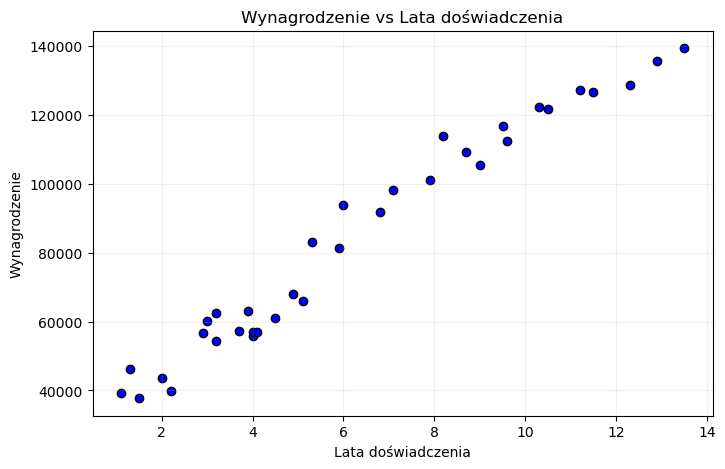

In [33]:
df = pd.read_csv('Salary.csv')
plt.figure(figsize=(8,5))
plt.scatter(df['YearsExperience'], df['Salary'], color='blue', edgecolor='k')
plt.xlabel('Lata doświadczenia')
plt.ylabel('Wynagrodzenie')
plt.title('Wynagrodzenie vs Lata doświadczenia')
plt.grid(True, alpha=0.2)
plt.show()



### Zadanie 2

Implementacja algorytmu regresji liniowej prostej.

Żeby dobrze zrozumieć zapis matematyczny, który początkowo może sprawiać problemy, przejdziemy po kolei po elementach składowych algorytmu. Następnie złączymy elementy w całość.

Wzór na regresję liniową w naszym przypadku będzie wyglądał następująco:

\begin{equation}
f(x^{(i)}) = \beta_{0} + \beta_{1}x_1 = \beta_{0} + \beta_{1}  YearsExperience
\end{equation}

Przypomnijmy, że zapis $x^{(i)}$ oznacza wektor dla $i$-tej obserwacji. W naszym przypadku ten wektor będzie zawierał tylko $1$ wartość dla cechy $YearsExperience$.


_Uwaga: W różnych źródłach algorytm regresji liniowej ma różne zapisy. Czasem podawane są wzory w postaci z sumą, czasem w postaci macierzowej. Jest to spowodowane tym, że algorytm można zaimplementować na te dwa sposoby. Łatwiejszym i bardziej intuicyjnym podejściem jest podejście z sumą, która bezpośrednio sugeruje wykokrzystanie pętli w celu iteracji po obserwacjach/cechach. Implementacja z wykorzystaniem macierzy jest zwykle krótsza i "bardziej elegancka", ale również bardziej wydajna. Aby dobrze zrozumieć działanie algorytmu, najlepiej jest zaimplementować obie wersje i porównać je ze sobą._


#### 2.1 Inicjalizacja współczynników $\beta$ regresji

Pierwszym krokiem jest inicjalizacja współczynników regresji. W przypadku regresji liniowej prostej mamy dwa współczynniki $\beta_{0}$ i $\beta_{1}$. Stwórz dwie zmienne będące współczynnikami regresji liniowej prostej i zainicjalizuj je losowymi wartościami z przedziału $(0,1)$.

Dodatkowo stwórz zmienną *alpha*, która przyjmie wartość od $(0,1)$. Możesz ustawić ją ręcznie i sprawdzać jak różne wartości mają wpływ na regresję. 

In [34]:
def initialize_coefficients() -> Tuple[float, float, list]:
    # Losowe wartości początkowe z zakresu (0, 1)
    beta0 = np.random.rand()
    beta1 = np.random.rand()
    error_history = []
    return beta0, beta1, error_history

# beta0, beta1, error_history = initialize_coefficients()
# print(beta0, beta1)

#### 2.2 Obliczenie predykcji

Kolejnym krokiem jest obliczenie wartości funkcji regresji dla wszystkich obserwacji w zbiorze danych. Jest to po prostu wstawienie kolejnych wartości pod wzrór regresji.

\begin{equation}
f(x) = \beta_{0} + \beta_{1}x_1
\end{equation}

Można zrobić to z wykorzystaniem operacji na macierzach (wektorach), albo z wykorzystaniem klasycznej iteracji. 

In [35]:
def calculate_regression_function(x: np.ndarray, beta0: float, beta1: float) -> np.ndarray:
    return beta0 + beta1 * x


#### 2.3 Obliczenie błędu

Obliczenie wartości błędu regresji nie jest konieczne do aktualizacji wag, jednak jest to bardzo cenna informacja czy nasz algorytm działa poprawnie. Wartość błędu nie może rosnąć w kolejnych epokach.

Błąd należy obliczyć zgodnie ze wzorem:

\begin{equation}
    SSR = \frac{1}{2m} \sum_{i=1}^{m}(f(x^{(i)}) - y^{(i)})^2
\end{equation}

In [36]:
def calculate_error(predictions: np.ndarray, y: np.ndarray, beta0: float, beta1: float) -> float:
    mse = np.mean((y - predictions) ** 2)
    return mse

#### 2.4 Obliczenie gradientu 

Żeby obliczyć gradient, należy obliczyć pochodne cząstkowe względem parametrów $\beta_{0}$ i $\beta_{1}$.

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{0}} = \frac{1}{m} \sum^{m}_{i=1} (f(x^{(i)}) - y^{(i)})
\end{equation}

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{1}} = \frac{1}{m} \sum^{m}_{i=1} (f(x^{(i)}) - y^{(i)})x_{1}^{(i)}
\end{equation}

Tutaj ponownie jak wcześniej można wykorzystać operacje na macierzach, lub iteracyjnie obliczyć sumę.

In [37]:
def calculate_gradient(predictions: np.ndarray, y: np.ndarray, beta0: float, beta1: float, x: np.ndarray) -> Tuple[float, float]:
    n = len(y)
    diff = y - predictions
    d_beta0 = -2 * np.mean(diff)
    d_beta1 = -2 * np.mean(diff * x)
    return d_beta0, d_beta1


####  2.5 Aktualizacja współczynników regresji (wag)

Po obliczeniu pochodnych cząstkowych należy obliczyć nowe wartości dla współczynników regresji.


\begin{equation}
    \beta_{0} = \beta_{0} - \alpha \frac{\partial SSR}{\partial \beta_{0}} 
\end{equation}

\begin{equation}
    \beta_{1} = \beta_{1} - \alpha \frac{\partial SSR}{\partial \beta_{1}} 
\end{equation}

In [38]:
def update_regression_coefficients(x: np.ndarray, y: np.ndarray, beta0: float, beta1: float, alpha: float) -> Tuple[float, float]:
    predictions = calculate_regression_function(x, beta0, beta1)
    grad_b0, grad_b1 = calculate_gradient(predictions, y, beta0, beta1, x)
    # aktualizacja parametrów
    beta0_new = beta0 - alpha * grad_b0
    beta1_new = beta1 - alpha * grad_b1
    return beta0_new, beta1_new


#### 2.6 Finalna wersja algorytmu

Powyższe działania, to wszystkie elementy potrzebne do stworzenia algorytmu regresji liniowej prostej. Jeden cykl takich operacji nazywany jest **epoką**. Idea obliczania współczynników regresji z wykorzystaniem gradientu polega na iteracyjnym aktualizowaniu współczynników do momentu, aż błąd przestanie znacznie się zmieniać. Można również ustawić jakaś stałą ilość epok. W każdej epoce wykorzystuje się ponownie ten sam zestaw danych.

Skoro wiadomo już jakie pojedyncze etapy należy wykonać, żeby obliczyć regresję liniową prostą, przyszedł czas na zebranie wszystkiego w jednym miejscu.

Proszę zaimplementować funkcję `learn_and_fit(x, y)`, która dla danych wejściowych będzie zwracać współczynniki regresji w każdej z epok. Dodatkowo proszę zwracać również błąd regresji w każdej epoce. Funkcja może być zaimplementowana w dowolny sposób. Może bezpośrednio zawierać wszystkie instrukcje, może korzystać z innych funkcji pomocniczych albo może korzystać z klasy reprezentującą regresję liniową prostą. 

Na końcu notebooka znajduje się test jednostkowy, który musi przechodzić przy prawidłowej implementacji algorytmu.

In [39]:
'''
input:
x - wartości zmiennej objaśniającej YearsExperience dla wszystkich obserwacji
y - wartości zmiennej objaśnianej Salary dla wszystkich obserwacji

output:
b0: [] - lista z współczynnikami beta_0 w każdej z epok
b1: [] - lista z współczynnikami beta_1 w każdej z epok
error: [] - lista z błędem w każdej epoce
'''


def learn_and_fit(x: np.ndarray, y: np.ndarray, alpha: float = 0.01, epochs: int = 1000) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    beta0, beta1, error_history = initialize_coefficients()
    b0_list = [beta0]
    b1_list = [beta1]
    for epoch in range(epochs):
        predictions = calculate_regression_function(x, beta0, beta1)
        mse = calculate_error(predictions, y, beta0, beta1)
        error_history.append(mse)
        grad_b0, grad_b1 = calculate_gradient(predictions, y, beta0, beta1, x)
        beta0 = beta0 - alpha * grad_b0
        beta1 = beta1 - alpha * grad_b1
        b0_list.append(beta0)
        b1_list.append(beta1)
    return np.array(b0_list), np.array(b1_list), np.array(error_history)


b0, b1, error = learn_and_fit(df['YearsExperience'].values, df['Salary'].values)
print(b0[:5], b1[:5], error[:5])   # przykładowy podgląd


[4.31868730e-01 1.67815898e+03 1.70620267e+03 1.84179110e+03
 1.96966938e+03] [2.60181551e-01 1.28092526e+04 1.19524373e+04 1.19920531e+04
 1.19729504e+04] [8.04408578e+09 2.46227596e+08 2.10988704e+08 2.09161920e+08
 2.07494839e+08]


### Zadanie 3

Stwórz wykres zmiany błędu regresji (oś Y) względem epoki (oś X)

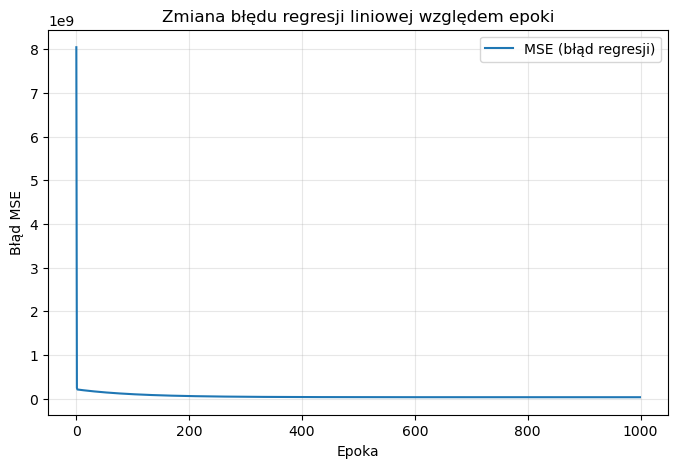

In [40]:
plt.figure(figsize=(8, 5))
plt.plot(error, label='MSE (błąd regresji)')
plt.xlabel('Epoka')
plt.ylabel('Błąd MSE')
plt.title('Zmiana błędu regresji liniowej względem epoki')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Zadanie 4

Do wykresu stworzonego w zadaniu 1 dodaj prostą regresji. Stwórz 3 wykresy przedstawiające jak zmieniała się funkcja regresji na przestrzeni epok (pierwsza, środkowa, ostatnia epoka).

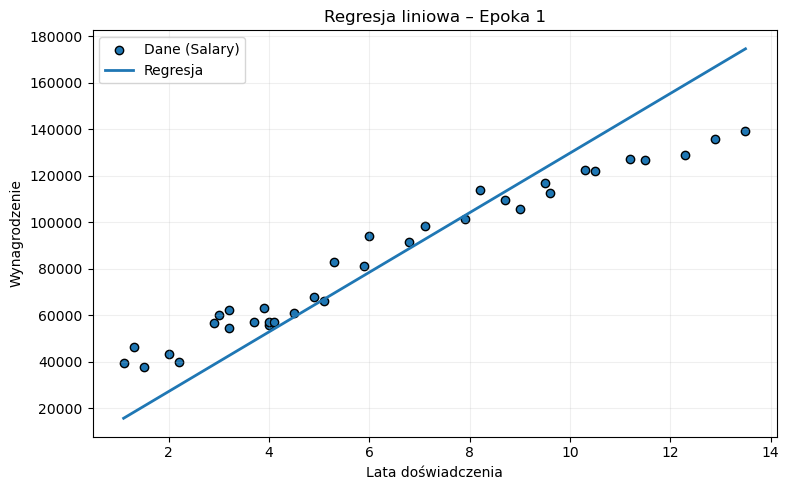

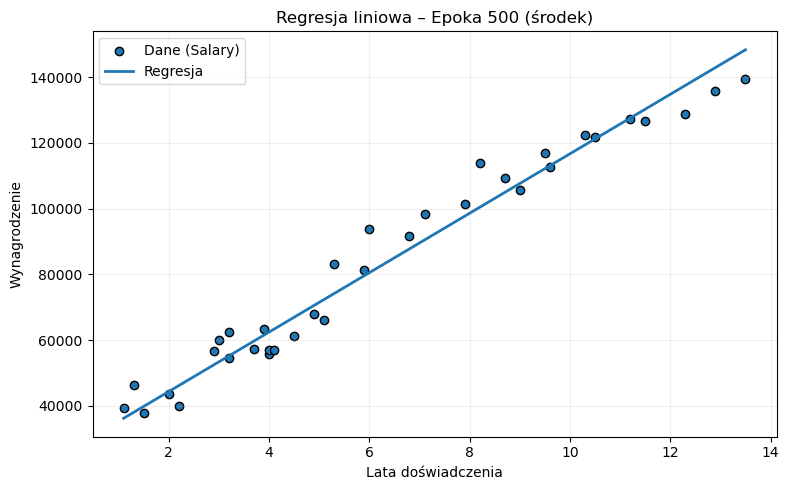

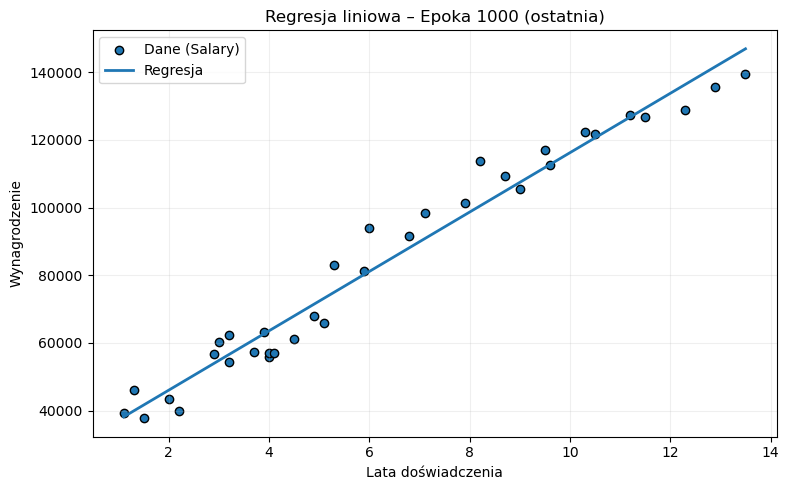

In [41]:
x = df["YearsExperience"].values
y = df["Salary"].values
first_idx  = 1
middle_idx = len(b0) // 2
last_idx   = -1         # ostatnia epoka

def regression_line(x_vals, b0_i, b1_i):
    return calculate_regression_function(x_vals, b0_i, b1_i)

selected = [
    (first_idx,  f"Epoka {first_idx}"),
    (middle_idx, f"Epoka {middle_idx} (środek)"),
    (last_idx,   f"Epoka {len(b0)-1} (ostatnia)"),
]

for idx, title in selected:
    plt.figure(figsize=(8, 5))
    plt.scatter(
        x,
        df["Salary"].values,
        label="Dane (Salary)",
        edgecolor="k",
    )
    plt.plot(
        x,
        regression_line(x, b0[idx], b1[idx]),
        linewidth=2,
        label="Regresja",
    )

    plt.xlabel("Lata doświadczenia")
    plt.ylabel("Wynagrodzenie")
    plt.title(f"Regresja liniowa – {title}")
    plt.legend()
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()


### Zadanie 5

Wybierz dowolnie trzy różne wartości współczynnika $\alpha$. Ile epok mu zostać użytych żeby otrzymać zamierzoną wartość błędu?

alpha=0.0001, końcowy błąd: 197876521.79
alpha=0.001, końcowy błąd: 103567072.41
alpha=0.01, końcowy błąd: 34254115.05


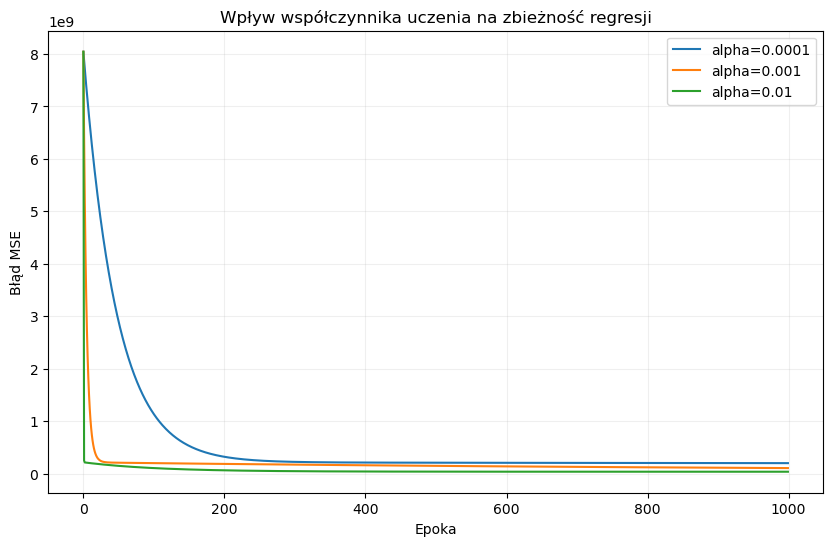

In [42]:
alphas = [0.0001, 0.001, 0.01]
epochs = 1000

plt.figure(figsize=(10, 6))

for alpha in alphas:
    b0, b1, error = learn_and_fit(df['YearsExperience'].values, df['Salary'].values, alpha=alpha, epochs=epochs)
    plt.plot(error, label=f'alpha={alpha}')
    print(f'alpha={alpha}, końcowy błąd: {error[-1]:.2f}')

plt.xlabel('Epoka')
plt.ylabel('Błąd MSE')
plt.title('Wpływ współczynnika uczenia na zbieżność regresji')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

### Testy jednostkowe

In [43]:
import unittest
import pandas as pd


class SimpleLinearRegressionTest(unittest.TestCase):

    def test_learn_and_fit(self):
        df = pd.read_csv('Salary.csv', sep=',')
        x = df['YearsExperience'].values.reshape(df['YearsExperience'].shape[0], 1)
        y = df['Salary'].values.reshape(df['Salary'].shape[0], 1)

        b0, b1, error = learn_and_fit(x, y)

        self.assertTrue(len(b0) > 1)
        self.assertTrue(len(b1) > 1)
        self.assertTrue(len(b0) == len(b1))
        self.assertTrue(all(i >= j for i, j in zip(error, error[1:])))  #Sprawdzenie, czy błędy nie rosną


unittest.main(argv=[''], verbosity=2, exit=False)

test_coefficients_in_0_1_range (__main__.CoefficientInitializationTest.test_coefficients_in_0_1_range) ... ok
test_learn_and_fit (__main__.SimpleLinearRegressionTest.test_learn_and_fit) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.061s

OK


### Zadanie 6

Stwórz test jednostkowy sprawdzający czy funkcja inicjalizująca współczynniki regresji zwraca wartości z przedziału (0, 1)

In [44]:
import unittest

class CoefficientInitializationTest(unittest.TestCase):
    def test_coefficients_in_0_1_range(self):
        for _ in range(100):  # sprawdź wiele losowań (opcjonalnie)
            beta0, beta1, _ = initialize_coefficients()
            self.assertTrue(0 < beta0 < 1, f"beta0 spoza zakresu: {beta0}")
            self.assertTrue(0 < beta1 < 1, f"beta1 spoza zakresu: {beta1}")

unittest.main(argv=[''], verbosity=2, exit=False)


test_coefficients_in_0_1_range (__main__.CoefficientInitializationTest.test_coefficients_in_0_1_range) ... ok
test_learn_and_fit (__main__.SimpleLinearRegressionTest.test_learn_and_fit) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.072s

OK
